In [98]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

In [99]:
abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [100]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

In [101]:
abalone_features = np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

In [102]:
abalone_model = tf.keras.Sequential([
  layers.Dense(64, activation='relu'),
  layers.Dense(1)
])

abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                      optimizer = tf.keras.optimizers.Adam())

In [103]:
abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 82.0545
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 25.1979
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - loss: 8.7737 
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 8.1798
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 7.7900
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 7.3823
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - loss: 7.0394
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - loss: 6.7365
Epoch 9/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 6.5333
Epoch 10/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 6.3856


In [104]:
normalize = layers.Normalization()

In [105]:
normalize.adapt(abalone_features)

In [106]:
norm_abalone_model = tf.keras.Sequential([
  normalize,
  layers.Dense(64, activation='relu'),
  layers.Dense(1)
])

norm_abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                           optimizer = tf.keras.optimizers.Adam())

norm_abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 77.4656
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 39.7571
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 28.4735
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 19.0354
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - loss: 11.4099
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 7.9307
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 6.8672
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 6.3903
Epoch 9/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 6.0715
Epoch 10/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 5.7994


In [107]:
titanic = pd.read_csv('csv_result-titanic.csv')
titanic.head()

,id,'pclass',survived,'name','sex','age','sibsp','parch','ticket','fare','cabin','embarked','boat','body','home.dest'
0,1,1,1,"Allen,Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis,MO"
1,2,1,1,"Allison,Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal,PQ / Chesterville,ON"
2,3,1,0,"Allison,Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal,PQ / Chesterville,ON"
3,4,1,0,"Allison,Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal,PQ / Chesterville,ON"
4,5,1,0,"Allison,Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal,PQ / Chesterville,ON"


In [108]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

In [109]:
# Create a symbolic input
input = tf.keras.Input(shape=(), dtype=tf.float32)

# Perform a calculation using the input
result = 2*input + 1

# the result doesn't have a value
result

<KerasTensor shape=(None,), dtype=float32, sparse=False, ragged=False, name=keras_tensor_205>

In [110]:
calc = tf.keras.Model(inputs=input, outputs=result)

In [111]:
print(calc(np.array([1])).numpy())
print(calc(np.array([2])).numpy())

[3.]
[5.]


In [112]:
inputs = {}

for name, column in titanic_features.items():
  dtype = column.dtype
  if dtype == object:
    dtype = tf.string
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'id': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=id>,
 "'pclass'": <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name='pclass'>,
 "'name'": <KerasTensor shape=(None, 1), dtype=string, sparse=False, ragged=False, name='name'>,
 "'sex'": <KerasTensor shape=(None, 1), dtype=string, sparse=False, ragged=False, name='sex'>,
 "'age'": <KerasTensor shape=(None, 1), dtype=string, sparse=False, ragged=False, name='age'>,
 "'sibsp'": <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name='sibsp'>,
 "'parch'": <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name='parch'>,
 "'ticket'": <KerasTensor shape=(None, 1), dtype=string, sparse=False, ragged=False, name='ticket'>,
 "'fare'": <KerasTensor shape=(None, 1), dtype=string, sparse=False, ragged=False, name='fare'>,
 "'cabin'": <KerasTensor shape=(None, 1), dtype=string, sparse=False, ragged=False, name='cabin'>,
 "'embarked'": <KerasTen

In [113]:
numeric_inputs = {name:input for name,input in inputs.items()
                  if input.dtype==tf.float32}

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = layers.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

<KerasTensor shape=(None, 4), dtype=float32, sparse=False, ragged=False, name=keras_tensor_207>

In [114]:
preprocessed_inputs = [all_numeric_inputs]

In [115]:
for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue

  lookup = layers.StringLookup(vocabulary=np.unique(titanic_features[name]))
  one_hot = layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

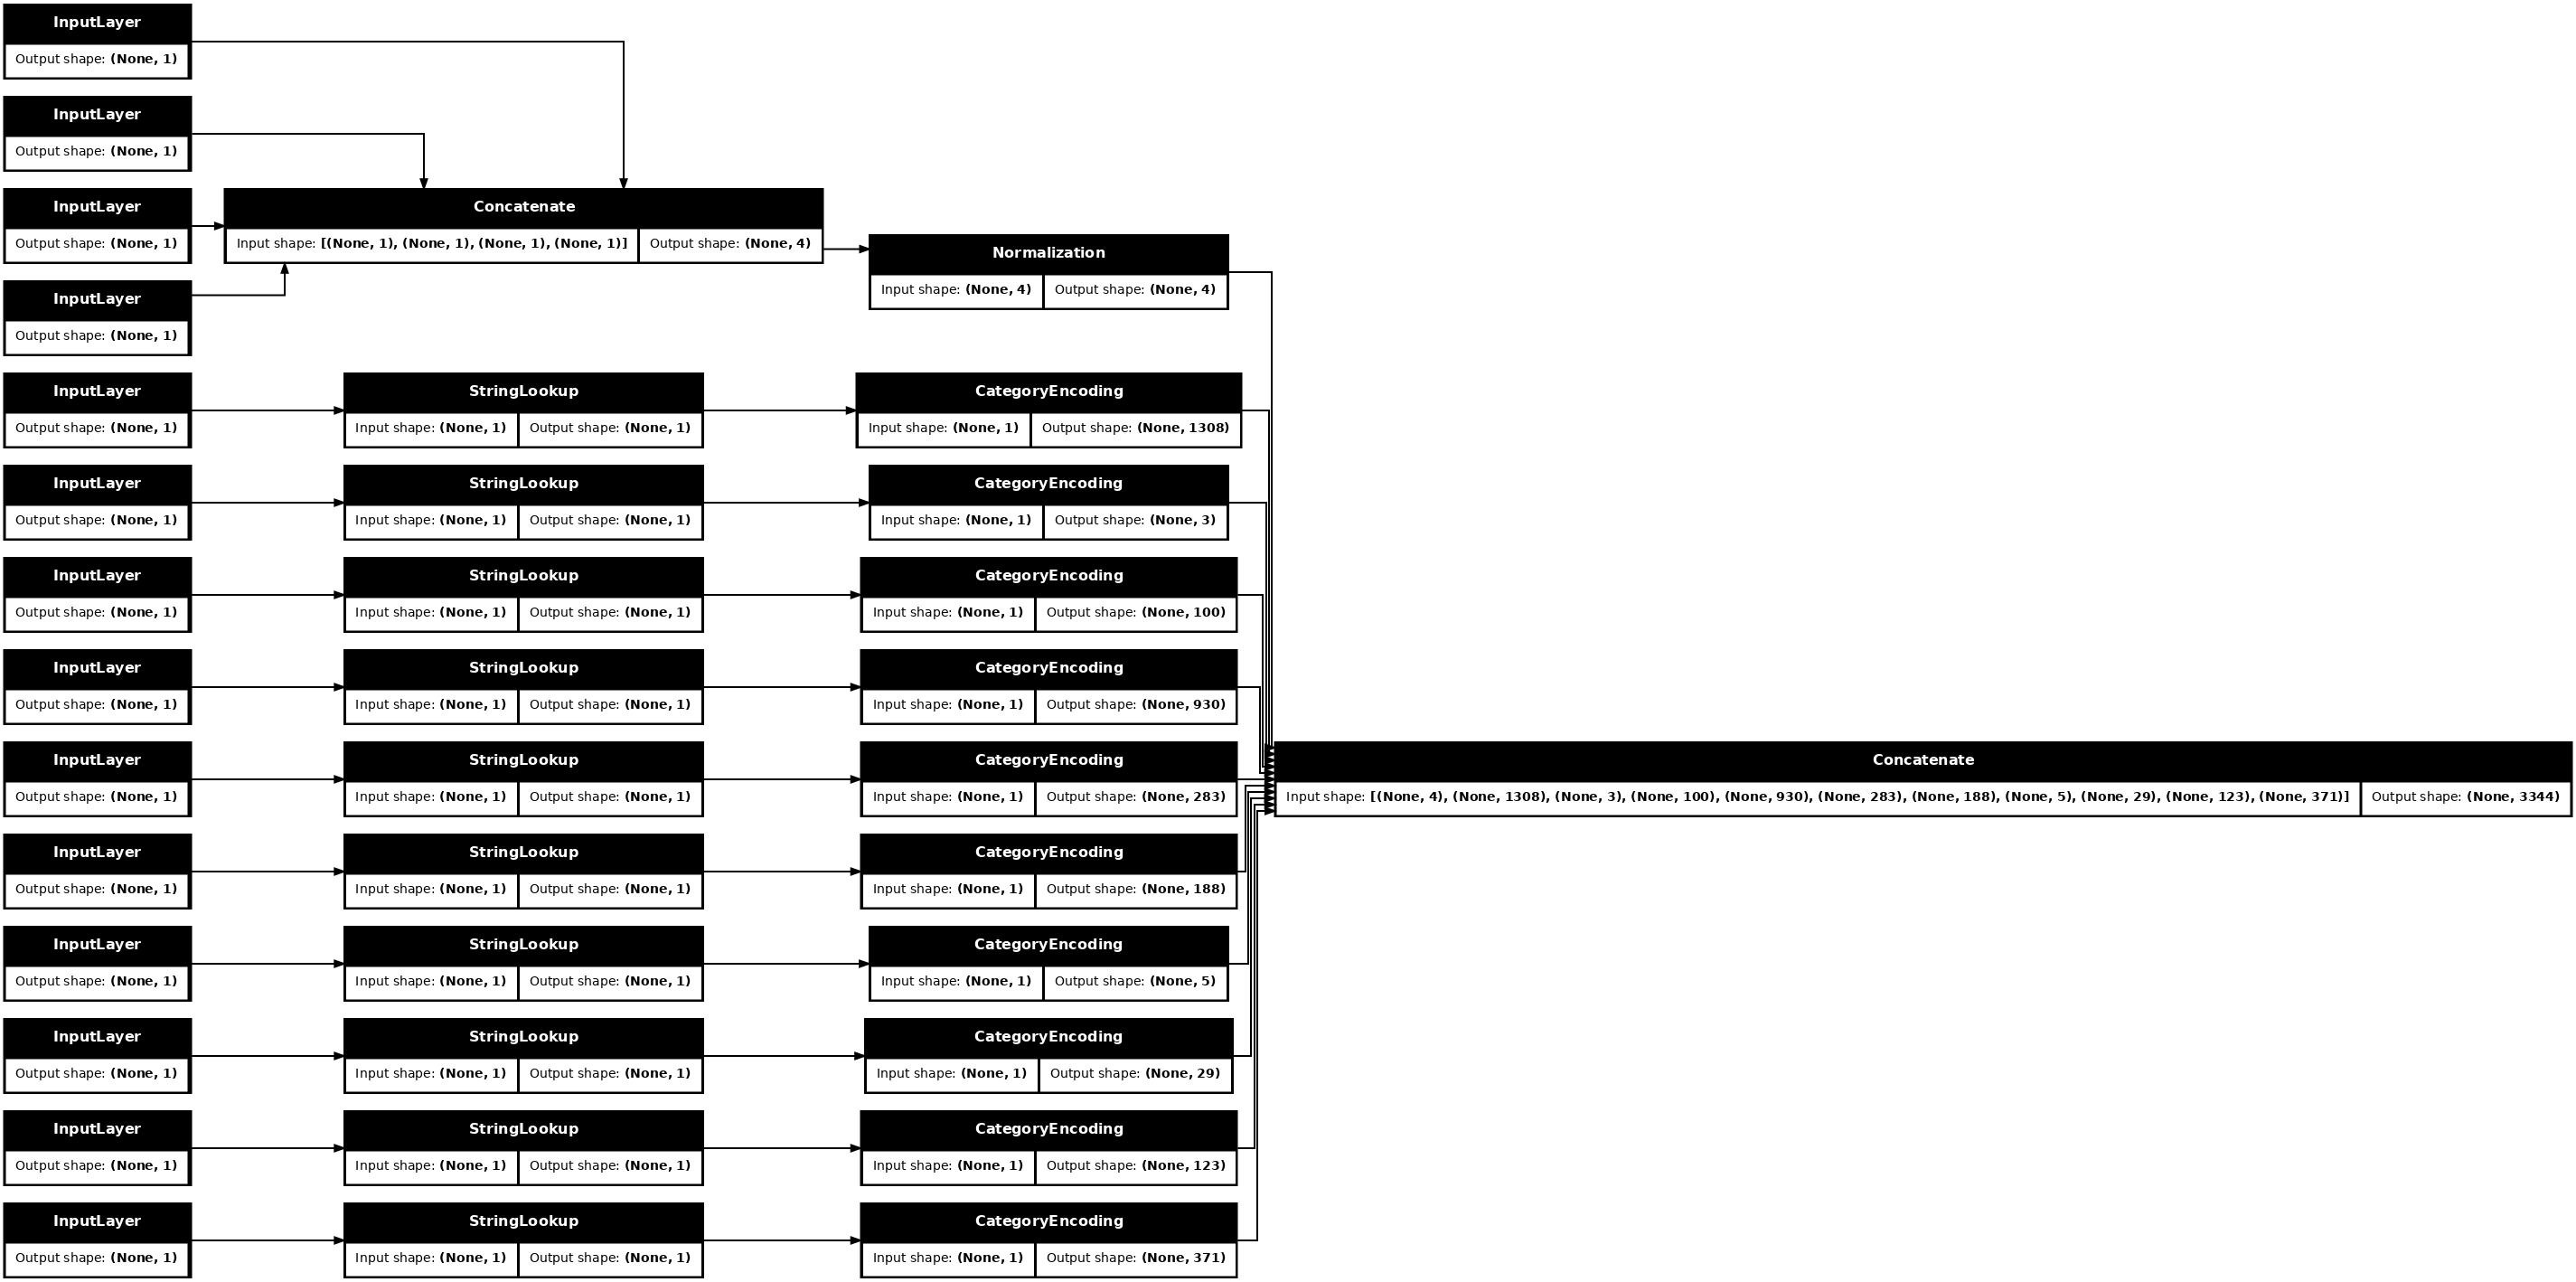

In [116]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(model = titanic_preprocessing , rankdir="LR", dpi=72, show_shapes=True)

In [117]:
titanic_features_dict = {name: np.array(value) 
                         for name, value in titanic_features.items()}

In [118]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}
titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 3344), dtype=float32, numpy=
array([[-1.731, -1.546, -0.479, ...,  0.   ,  0.   ,  0.   ]],
      dtype=float32)>

In [119]:
def titanic_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam())
  return model

titanic_model = titanic_model(titanic_preprocessing, inputs)

In [120]:
titanic_model.fit(x=titanic_features_dict, y=titanic_labels, epochs=10)

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5615
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3302
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1668
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0898
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0558
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0389
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0288
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0225
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0176
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0138


In [121]:
titanic_model.save('test.keras')
reloaded = tf.keras.models.load_model('test.keras')

In [122]:
titanic_file_path = ('csv_result-titanic.csv')

In [123]:
titanic_csv_ds = tf.data.experimental.make_csv_dataset(
    titanic_file_path,
    batch_size=5, # Artificially small to make examples easier to show.
    label_name='survived',
    num_epochs=1,
    ignore_errors=True,)

In [124]:
for batch, label in titanic_csv_ds.take(1):
  for key, value in batch.items():
    print(f"{key:20s}: {value}")
  print()
  print(f"{'label':20s}: {label}")

id                  : [ 957  288 1084  639  699]
'pclass'            : [3 1 3 3 3]
'name'              : [b'Lefebre,Miss. Jeannie' b'Sutton,Mr. Frederick'
 b'Olsen,Mr. Henry Margido' b'Asim,Mr. Adola' b'Cacic,Mr. Jego Grga']
'sex'               : [b'female' b'male' b'male' b'male' b'male']
'age'               : [b'?' b'61' b'28' b'35' b'18']
'sibsp'             : [3 0 0 0 0]
'parch'             : [1 0 0 0 0]
'ticket'            : [b'4133' b'36963' b'C 4001' b'SOTON/O.Q. 3101310' b'315091']
'fare'              : [25.467 32.321 22.525  7.05   8.663]
'cabin'             : [b'?' b'D50' b'?' b'?' b'?']
'embarked'          : [b'S' b'S' b'S' b'S' b'S']
'boat'              : [b'?' b'?' b'?' b'?' b'?']
'body'              : [b'?' b'46' b'173' b'?' b'?']
'home.dest'         : [b'?' b'Haddenfield,NJ' b'?' b'?' b'?']

label               : [0 0 0 0 0]


In [125]:
traffic_volume_csv_gz = tf.keras.utils.get_file(
    'Metro_Interstate_Traffic_Volume.csv.gz', 
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz",
    cache_dir='.', cache_subdir='traffic')

In [126]:
traffic_volume_csv_gz_ds = tf.data.experimental.make_csv_dataset(
    traffic_volume_csv_gz,
    batch_size=256,
    label_name='traffic_volume',
    num_epochs=1,
    compression_type="GZIP")

for batch, label in traffic_volume_csv_gz_ds.take(1):
  for key, value in batch.items():
    print(f"{key:20s}: {value[:5]}")
  print()
  print(f"{'label':20s}: {label[:5]}")

holiday             : [b'None' b'None' b'None' b'None' b'None']
temp                : [279.63 272.41 273.81 290.47 294.53]
rain_1h             : [0. 0. 0. 0. 0.]
snow_1h             : [0. 0. 0. 0. 0.]
clouds_all          : [40 90 90 90  0]
weather_main        : [b'Clouds' b'Fog' b'Snow' b'Clouds' b'Clear']
weather_description : [b'scattered clouds' b'fog' b'heavy snow' b'overcast clouds'
 b'Sky is Clear']
date_time           : [b'2012-11-21 17:00:00' b'2012-12-10 12:00:00' b'2013-04-15 20:00:00'
 b'2013-09-17 11:00:00' b'2013-06-16 21:00:00']

label               : [4964 3866 2727 4816 2873]


In [127]:
%%time
for i, (batch, label) in enumerate(traffic_volume_csv_gz_ds.repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

...............................................................................................
CPU times: user 5.48 s, sys: 941 ms, total: 6.42 s
Wall time: 3.93 s


In [128]:
%%time
caching = traffic_volume_csv_gz_ds.cache().shuffle(1000)

for i, (batch, label) in enumerate(caching.shuffle(1000).repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

...............................................................................................
CPU times: user 897 ms, sys: 80.8 ms, total: 978 ms
Wall time: 806 ms


In [129]:
%%time
snapshotting = traffic_volume_csv_gz_ds.snapshot('titanic.tfsnap').shuffle(1000)

for i, (batch, label) in enumerate(snapshotting.shuffle(1000).repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

...............................................................................................
CPU times: user 1.3 s, sys: 154 ms, total: 1.45 s
Wall time: 770 ms


In [130]:
fonts_zip = tf.keras.utils.get_file(
    'fonts.zip',  "https://archive.ics.uci.edu/ml/machine-learning-databases/00417/fonts.zip",
    cache_dir='.', cache_subdir='fonts',
    extract=True)

In [131]:
import pathlib
font_csvs =  sorted(str(p) for p in pathlib.Path('fonts/fonts_extracted').glob("*.csv"))

font_csvs[:10]

['fonts/fonts_extracted/AGENCY.csv',
 'fonts/fonts_extracted/ARIAL.csv',
 'fonts/fonts_extracted/BAITI.csv',
 'fonts/fonts_extracted/BANKGOTHIC.csv',
 'fonts/fonts_extracted/BASKERVILLE.csv',
 'fonts/fonts_extracted/BAUHAUS.csv',
 'fonts/fonts_extracted/BELL.csv',
 'fonts/fonts_extracted/BERLIN.csv',
 'fonts/fonts_extracted/BERNARD.csv',
 'fonts/fonts_extracted/BITSTREAMVERA.csv']

In [132]:
len(font_csvs)

153

In [133]:
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern = "fonts/fonts_extracted/*.csv",
    batch_size=10, num_epochs=1,
    num_parallel_reads=20,
    shuffle_buffer_size=10000)

In [134]:
for features in fonts_ds.take(1):
  for i, (name, value) in enumerate(features.items()):
    if i>15:
      break
    print(f"{name:20s}: {value}")
print('...')
print(f"[total: {len(features)} features]")

font                : [b'BOOKMAN' b'VLADIMIR' b'CASTELLAR' b'NIAGARA' b'HARLOW' b'NIAGARA'
 b'BERLIN' b'BOOKMAN' b'JOKERMAN' b'ROMAN']
fontVariant         : [b'BOOKMAN OLD STYLE' b'VLADIMIR SCRIPT' b'CASTELLAR' b'NIAGARA SOLID'
 b'HARLOW SOLID ITALIC' b'NIAGARA SOLID' b'BERLIN SANS FB DEMI'
 b'BOOKMAN OLD STYLE' b'JOKERMAN' b'ROMANT']
m_label             : [ 950  321 8250   74  338  305  207 9554   77 1094]
strength            : [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
italic              : [0 0 1 1 1 1 0 0 0 0]
orientation         : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
m_top               : [35 36 42 32 34 44 24 54 39 56]
m_left              : [22 12 26 24 27 20 18 41 14 25]
originalH           : [63 46 30 47 54 35 58 44 62 45]
originalW           : [26 67 18 31 70 19 26 27 65 46]
h                   : [20 20 20 20 20 20 20 20 20 20]
w                   : [20 20 20 20 20 20 20 20 20 20]
r0c0                : [193   1   1   1   1   1 255 255   1 114]
r0c1                : [255   1   1   1 

In [135]:
import re

def make_images(features):
  image = [None]*400
  new_feats = {}

  for name, value in features.items():
    match = re.match('r(\d+)c(\d+)', name)
    if match:
      image[int(match.group(1))*20+int(match.group(2))] = value
    else:
      new_feats[name] = value

  image = tf.stack(image, axis=0)
  image = tf.reshape(image, [20, 20, -1])
  new_feats['image'] = image

  return new_feats

In [136]:
fonts_image_ds = fonts_ds.map(make_images)

for features in fonts_image_ds.take(1):
  break

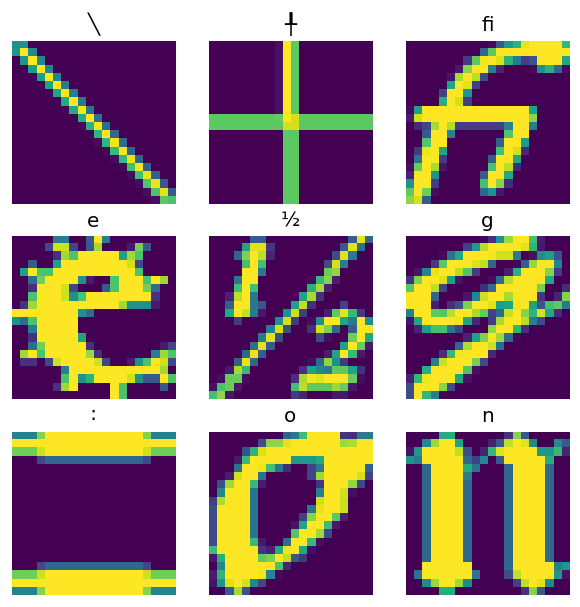

In [137]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6,6), dpi=120)

for n in range(9):
  plt.subplot(3,3,n+1)
  plt.imshow(features['image'][..., n])
  plt.title(chr(features['m_label'][n]))
  plt.axis('off')

In [180]:
text = pathlib.Path(titanic_file_path).read_text()
lines = text.split('\n')[1:-1]

all_strings = [str()]*15
all_strings

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

In [181]:
features = tf.io.decode_csv(lines, record_defaults=all_strings) 

for f in features:
  print(f"type: {f.dtype.name}, shape: {f.shape}")

type: string, shape: (1309,)
type: string, shape: (1309,)
type: string, shape: (1309,)
type: string, shape: (1309,)
type: string, shape: (1309,)
type: string, shape: (1309,)
type: string, shape: (1309,)
type: string, shape: (1309,)
type: string, shape: (1309,)
type: string, shape: (1309,)
type: string, shape: (1309,)
type: string, shape: (1309,)
type: string, shape: (1309,)
type: string, shape: (1309,)
type: string, shape: (1309,)


In [156]:
print(lines[0])

1,1,1,"Allen,Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis,MO"


In [182]:
simple_titanic = tf.data.experimental.CsvDataset(titanic_file_path, record_defaults=titanic_types, header=True)

for example in simple_titanic.take(1):
  print([e.numpy() for e in example])

[np.int32(1), np.int32(1), np.int32(1), b'Allen,Miss. Elisabeth Walton', b'female', np.int32(29), np.int32(0), np.int32(0), np.int32(24160), np.float32(211.3375), b'B5', b'S', b'2', b'?', b'St Louis,MO']


In [183]:
def decode_titanic_line(line):
  return tf.io.decode_csv(line, titanic_types)

manual_titanic = (
    # Load the lines of text
    tf.data.TextLineDataset(titanic_file_path)
    # Skip the header row.
    .skip(1)
    # Decode the line.
    .map(decode_titanic_line)
)

for example in manual_titanic.take(1):
  print([e.numpy() for e in example])

[np.int32(1), np.int32(1), np.int32(1), b'Allen,Miss. Elisabeth Walton', b'female', np.int32(29), np.int32(0), np.int32(0), np.int32(24160), np.float32(211.3375), b'B5', b'S', b'2', b'?', b'St Louis,MO']


In [184]:
font_line = pathlib.Path(font_csvs[0]).read_text().splitlines()[1]
print(font_line)

AGENCY,AGENCY FB,64258,0.400000,0,0.000000,35,21,51,22,20,20,1,1,1,21,101,210,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1,1,1,93,255,255,255,176,146,146,146,146,146,146,146,146,216,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,141,141,141,182,255,255,255,172,141,141,141,115,1,1,1,1,163,255,255,255,255,255,255,255,255,255,255,255,255,255,255,209,1,1,1,1,163,255,255,255,6,6,6,96,255,255,255,74,6,6,6,5,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1

In [185]:
num_font_features = font_line.count(',')+1
font_column_types = [str(), str()] + [float()]*(num_font_features-2)

In [186]:
font_csvs[0]

'fonts/fonts_extracted/AGENCY.csv'

In [187]:
simple_font_ds = tf.data.experimental.CsvDataset(
    font_csvs, 
    record_defaults=font_column_types, 
    header=True)

In [188]:
for row in simple_font_ds.take(10):
  print(row[0].numpy())

b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'


In [190]:
font_files = tf.data.Dataset.list_files("fonts/fonts_extracted/*.csv")

In [191]:
print('Epoch 1:')
for f in list(font_files)[:5]:
  print("    ", f.numpy())
print('    ...')
print()

print('Epoch 2:')
for f in list(font_files)[:5]:
  print("    ", f.numpy())
print('    ...')

Epoch 1:
     b'fonts/fonts_extracted/FRENCH.csv'
     b'fonts/fonts_extracted/GOTHICE.csv'
     b'fonts/fonts_extracted/JAVANESE.csv'
     b'fonts/fonts_extracted/PROXY.csv'
     b'fonts/fonts_extracted/AGENCY.csv'
    ...

Epoch 2:
     b'fonts/fonts_extracted/CITYBLUEPRINT.csv'
     b'fonts/fonts_extracted/ROMAN.csv'
     b'fonts/fonts_extracted/FRENCH.csv'
     b'fonts/fonts_extracted/CAMBRIA.csv'
     b'fonts/fonts_extracted/E13B.csv'
    ...


In [192]:
def make_font_csv_ds(path):
  return tf.data.experimental.CsvDataset(
    path, 
    record_defaults=font_column_types, 
    header=True)

In [193]:
font_rows = font_files.interleave(make_font_csv_ds,
                                  cycle_length=3)

In [194]:
fonts_dict = {'font_name':[], 'character':[]}

for row in font_rows.take(10):
  fonts_dict['font_name'].append(row[0].numpy().decode())
  fonts_dict['character'].append(chr(int(row[2].numpy())))

pd.DataFrame(fonts_dict)

,font_name,character
0,MAGNETO,ﬂ
1,PMINGLIU-EXTB,™
2,REFERENCE,ﬂ
3,MAGNETO,ﬁ
4,PMINGLIU-EXTB,›
5,REFERENCE,ﬁ
6,MAGNETO,
7,PMINGLIU-EXTB,‹
8,REFERENCE,
9,MAGNETO,


In [198]:
BATCH_SIZE=2048
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern = "fonts/fonts_extracted/*.csv",
    batch_size=BATCH_SIZE, num_epochs=1,
    num_parallel_reads=100)

In [199]:
%%time
for i,batch in enumerate(fonts_ds.take(20)):
  print('.',end='')

print()

....................
CPU times: user 20.7 s, sys: 1.4 s, total: 22.1 s
Wall time: 7.86 s


In [201]:
fonts_files = tf.data.Dataset.list_files("fonts/fonts_extracted/*.csv")
fonts_lines = fonts_files.interleave(
    lambda fname:tf.data.TextLineDataset(fname).skip(1), 
    cycle_length=100).batch(BATCH_SIZE)

fonts_fast = fonts_lines.map(lambda x: tf.io.decode_csv(x, record_defaults=font_column_types))

In [202]:
%%time
for i,batch in enumerate(fonts_fast.take(20)):
  print('.',end='')

print()

....................
CPU times: user 1.25 s, sys: 42.4 ms, total: 1.3 s
Wall time: 368 ms
